# Sentiment Analysis

# By Mahesh S Valanju

### 1) Import Libraries

In [1]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
#nltk.downloader.download('vader_lexicon')
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

### 2) Authentication

In [2]:
consumerKey = 'ehe4OytjEN4UVePOumtIXC3if'
consumerSecret = 'XmRUfI0y3Elv2lZRkCqZurQ02ELqw89TjEWbAi0qtyAvhjEy9i'
accessToken = '2581071060-fW6Osch5ouWhepXWdgPZu7bPktaBRL1RTE3YZdK'
accessTokenSecret = 'vFftMfU6UYJ3z9FqzliEIk9dQsvvy19UjoRAq67AQ0vVN'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

### 3) Sentiment Analysis

In [3]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)

keyword = input('Please enter keyword or hashtag to search: ')
noOfTweet = int(input ('Please enter how many tweets to analyze: '))

tweets = tweepy.Cursor(api.search, q=keyword, lang="en").items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets: 
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1
            
    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
        
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
print(positive)
print(negative)
print(neutral)
print(polarity)

Please enter keyword or hashtag to search: #flipkart
Please enter how many tweets to analyze: 1000
17.0
17.5
65.5
6.218805916305913


In [4]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  1000
positive number:  170
negative number:  175
neutral number:  655


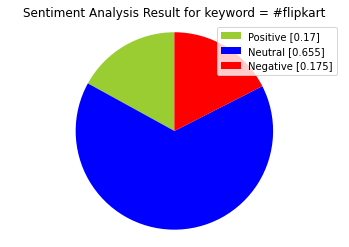

In [5]:
#Creating PieCart
labels = ['Positive ['+str(len(positive_list)/len(tweet_list))+']' , 'Neutral ['+str(len(neutral_list)/len(tweet_list))+']','Negative ['+str(len(negative_list)/len(tweet_list))+']']
sizes = [len(positive_list), len(neutral_list), len(negative_list)]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Result for keyword = '+keyword+'' )
plt.axis('equal')
plt.show()

In [6]:
tweet_list

,0
0,Kush Gold Food for Fasting Singhara (Water Che...
1,RT @Techy_Leakster: Flipkart Big Billion days ...
2,RT @yabhishekhd: Flipkart Big Billion days dat...
3,RT @yabhishekhd: Flipkart Big Billion days dat...
4,RT @MaiyroOfficial: Bzaar bags $4M to enable U...
...,...
995,RT @Filmy___corner: #KichchaSudeep Sir Ads wai...
996,@KacholeAshish At least you didn't waste more ...
997,"If you're planning for iPhone, i would say go ..."
998,Don't buy anything from #Flipkart \nI ordered ...


### 4) Cleaning Tweets

In [7]:
tweet_list.drop_duplicates(inplace = True)

In [8]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list['text'] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: ',' ',x)
#rt = lambda x: re.sub('(@[A-Za-z0–9]+)|([0-9A-Za-z \t])|(\w+:\/\/\S+)',' ',x)
rt = lambda x: re.sub('(@[0–9]+)|([0-9 \t])|(\w+:\/\/\S+)',' ',x)
tw_list['text'] = tw_list.text.map(remove_rt).map(rt)
tw_list['text'] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,Kush Gold Food for Fasting Singhara (Water Che...,kush gold food for fasting singhara (water che...
1,RT @Techy_Leakster: Flipkart Big Billion days ...,flipkart big billion days starting from nd o...
2,RT @yabhishekhd: Flipkart Big Billion days dat...,flipkart big billion days date revealed via i...
4,RT @MaiyroOfficial: Bzaar bags $4M to enable U...,bzaar bags $ m to enable us retailers to sour...
7,Bzaar bags $4M to enable US retailers to sourc...,bzaar bags $ m to enable us retailers to sourc...
13,RT @MrPhoneTech: Flipkart Big Billion Day will...,flipkart big billion day will starts at oc...
16,Full of scams Flipkart.... Boycott flipkart @F...,full of scams flipkart.... boycott flipkart @f...
24,ViVO iQOO Z5 first look Poster.\n\n#vivo #iQOO...,vivo iqoo z first look poster.\n\n#vivo #iqoo...
27,TOP 10 New Smartphones Launching in the Flipka...,top new smartphones launching in the flipka...
29,RT @PriyaSh07586343: Dumb and pathetic service...,"dumb and pathetic service by @bigbasket_com ,..."


In [9]:
tw_list['text'].head(50)

0     kush gold food for fasting singhara (water che...
1      flipkart big billion days starting from  nd o...
2      flipkart big billion days date revealed via i...
4      bzaar bags $ m to enable us retailers to sour...
7     bzaar bags $ m to enable us retailers to sourc...
13     flipkart big billion day will starts at    oc...
16    full of scams flipkart.... boycott flipkart @f...
24    vivo iqoo z  first look poster.\n\n#vivo #iqoo...
27    top    new smartphones launching in the flipka...
29     dumb and pathetic service by @bigbasket_com ,...
31     flipkart big billion days date revealed via i...
33    flipkart big billion day will starts at    oct...
34    flipkart big billion days starting from  nd oc...
37     @yabhishekhd when did f   sold for   ,    #fl...
38    flipkart big million days days date revealed v...
40     team @caitindia urged @cimgoi shri @piyushgoy...
41    #flipkart  my orders getting failed even after...
42    all thanks to bogus services of @flipkarts

### 5) Analyse Sentiments

In [10]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = 'negative'
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = 'positive'
    else:
        tw_list.loc[index, 'sentiment'] = 'neutral'
        tw_list.loc[index, 'neg'] = neg
        tw_list.loc[index, 'neu'] = neu
        tw_list.loc[index, 'pos'] = pos
        tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Kush Gold Food for Fasting Singhara (Water Che...,kush gold food for fasting singhara (water che...,0.400000,0.400000,neutral,0.0,1.0,0.0,0.0
1,RT @Techy_Leakster: Flipkart Big Billion days ...,flipkart big billion days starting from nd o...,0.000000,0.100000,neutral,0.0,1.0,0.0,0.0
2,RT @yabhishekhd: Flipkart Big Billion days dat...,flipkart big billion days date revealed via i...,0.000000,0.100000,neutral,0.0,1.0,0.0,0.0
4,RT @MaiyroOfficial: Bzaar bags $4M to enable U...,bzaar bags $ m to enable us retailers to sour...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
7,Bzaar bags $4M to enable US retailers to sourc...,bzaar bags $ m to enable us retailers to sourc...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
13,RT @MrPhoneTech: Flipkart Big Billion Day will...,flipkart big billion day will starts at oc...,0.000000,0.100000,neutral,0.0,1.0,0.0,0.0
16,Full of scams Flipkart.... Boycott flipkart @F...,full of scams flipkart.... boycott flipkart @f...,0.350000,0.550000,negative,NaN,NaN,NaN,NaN
24,ViVO iQOO Z5 first look Poster.\n\n#vivo #iQOO...,vivo iqoo z first look poster.\n\n#vivo #iqoo...,0.250000,0.333333,neutral,0.0,1.0,0.0,0.0
27,TOP 10 New Smartphones Launching in the Flipka...,top new smartphones launching in the flipka...,0.359091,0.451136,positive,NaN,NaN,NaN,NaN
29,RT @PriyaSh07586343: Dumb and pathetic service...,"dumb and pathetic service by @bigbasket_com ,...",-0.406250,0.708333,negative,NaN,NaN,NaN,NaN


In [11]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list['sentiment']=='negative']
tw_list_positive = tw_list[tw_list['sentiment']=='positive']
tw_list_neutral = tw_list[tw_list['sentiment']=='neutral']

In [12]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

#Count_values for sentiment
count_values_in_column(tw_list,'sentiment')

,Total,Percentage
neutral,182,39.06
positive,164,35.19
negative,120,25.75


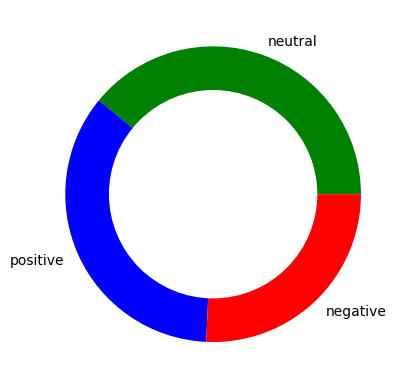

In [13]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,'sentiment')
names = pc.index
size=pc['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [14]:
import os 
os.chdir(r"C:\Users\Mahesh S Valanju\Desktop") 

In [15]:
#Function to Create Wordcloud
def create_wordcloud(text):
    mask = np.array(Image.open('amazon2.jpg'))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color='white',
    mask = mask,
    max_words=1000,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file('wc.png')
    print('Word Cloud Saved Successfully')
    path='wc.png'
    display(Image.open(path))

Word Cloud Saved Successfully


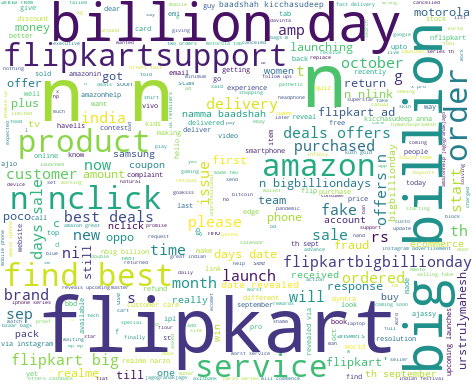

In [16]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list['text'].values)

Word Cloud Saved Successfully


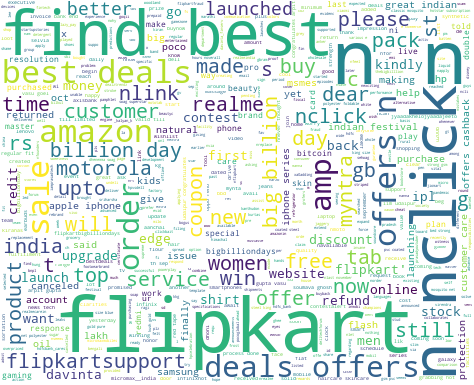

In [17]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive['text'].values)

Word Cloud Saved Successfully


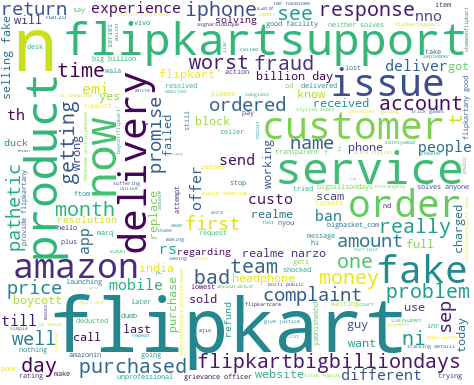

In [18]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative['text'].values)

In [19]:
#Calculating tweet’s lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tw_list.groupby('sentiment').text_len.mean()),2)

,text_len
sentiment,
negative,112.42
neutral,106.58
positive,100.02


In [20]:
round(pd.DataFrame(tw_list.groupby('sentiment').text_word_count.mean()),2)

,text_word_count
sentiment,
negative,17.49
neutral,15.50
positive,15.82


In [21]:
#Removing Punctuation
def remove_punct(text):
    text = ''.join([char for char in text if char not in string.punctuation])
    text = re.sub('[0–9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,Kush Gold Food for Fasting Singhara (Water Che...,kush gold food for fasting singhara (water che...,0.4,0.4,neutral,0.0,1.0,0.0,0.0,92,14,kush gold food for fasting singhara water ches...,"[kush, gold, food, for, fasting, singhara, wat...","[kush, gold, food, fasting, singhara, water, c...","[kush, gold, food, fast, singhara, water, ches..."
1,RT @Techy_Leakster: Flipkart Big Billion days ...,flipkart big billion days starting from nd o...,0.0,0.1,neutral,0.0,1.0,0.0,0.0,121,14,flipkart big billion days starting from nd o...,"[, flipkart, big, billion, days, starting, fro...","[, flipkart, big, billion, days, starting, nd,...","[, flipkart, big, billion, day, start, nd, oct..."
2,RT @yabhishekhd: Flipkart Big Billion days dat...,flipkart big billion days date revealed via i...,0.0,0.1,neutral,0.0,1.0,0.0,0.0,123,18,flipkart big billion days date revealed via i...,"[, flipkart, big, billion, days, date, reveale...","[, flipkart, big, billion, days, date, reveale...","[, flipkart, big, billion, day, date, reveal, ..."
4,RT @MaiyroOfficial: Bzaar bags $4M to enable U...,bzaar bags $ m to enable us retailers to sour...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,99,18,bzaar bags m to enable us retailers to sourc...,"[, bzaar, bags, m, to, enable, us, retailers, ...","[, bzaar, bags, enable, us, retailers, source,...","[, bzaar, bag, enabl, us, retail, sourc, home,..."
7,Bzaar bags $4M to enable US retailers to sourc...,bzaar bags $ m to enable us retailers to sourc...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,89,16,bzaar bags m to enable us retailers to source...,"[bzaar, bags, m, to, enable, us, retailers, to...","[bzaar, bags, enable, us, retailers, source, h...","[bzaar, bag, enabl, us, retail, sourc, home, l..."


In [22]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

#1281 Number of reviews has 2966 words

count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

466 Number of reviews has 1441 words


,,aajtak,aanchal,aap,abhimca,abl,abo,ac,accept,accord,...,yogrishiramdev,your,youtub,z,zebron,zero,zomato,ക,ദലത,ന
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
flipkart,395
day,83
big,70
billion,63
offer,58
flipkartsupport,57
order,52
click,52
deal,50
best,42


In [24]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('big billion', 63),
 ('billion days', 50),
 ('flipkart big', 39),
 ('deals offers', 37),
 ('click best', 33),
 ('best deals', 31),
 ('flipkart flipkart', 17),
 ('flipkart flipkartsupport', 17),
 ('offers deals', 16),
 ('days sale', 13),
 ('flipkartsupport flipkart', 13),
 ('billion day', 12),
 ('flipkart ad', 12),
 ('flipkartbigbilliondays flipkart', 11),
 ('flipkart flipkartbigbilliondays', 10),
 ('amazon flipkart', 10),
 ('days date', 9),
 ('realme narzo', 9),
 ('th september', 9),
 ('date revealed', 8)]

In [25]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)
n3_trigrams

[('big billion days', 50),
 ('flipkart big billion', 38),
 ('click best deals', 30),
 ('best deals offers', 21),
 ('deals offers deals', 16),
 ('offers deals offers', 16),
 ('billion days sale', 13),
 ('big billion day', 12),
 ('billion days date', 8),
 ('namma baadshah kicchasudeep', 8),
 ('baadshah kicchasudeep anna', 8),
 ('kicchasudeep anna new', 8),
 ('anna new flipkart', 8),
 ('billion days bigbilliondays', 8),
 ('days date revealed', 6),
 ('date revealed instagram', 6),
 ('new flipkart ad', 6),
 ('flipkart ad big', 6),
 ('ad big billion', 6),
 ('revealed instagram advertisement', 5)]